# A Comparison of the Runtimes between The Strassen, the IKJ Matrix Algorithm


In [1]:
%matplotlib inline 

import numpy as np
from math import ceil, log
import time
import matplotlib.pyplot as plt

In [2]:
plt.rcdefaults() ## for nice big graphs

The code implementation below was got from [MartinThoma](https://github.com/MartinThoma/matrix-multiplication/blob/master/Python/strassen-algorithm.py)s' GitHub page including the IKJ code. With minor modifications to code to use numpy and remove certain aspects of the initial authors implementation.

In [3]:
LEAF_SIZE=8
def printMatrix(matrix):
    for line in matrix:
        print ("\t".join(map(str,line)))

def ikjMatrixProduct(A, B):
    n = len(A)
    C = np.zeros((n,n))
    for i in range(n):
        for k in range(n):
            for j in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

def add(A, B):
    n = len(A)
    C = np.zeros((n,n))
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] + B[i][j]
    return C

def subtract(A, B):
    n = len(A)
    C = np.zeros((n,n))
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] - B[i][j]
    return C

def strassenR(A, B):
    """ 
        Implementation of the strassen algorithm.
    """
    n = len(A)

    if n <= LEAF_SIZE:
        return ikjMatrixProduct(A, B)
    else:
        # initializing the new sub-matrices
        newSize = n//2
        a11 = np.zeros((newSize,newSize))
        a12 = np.zeros((newSize,newSize))
        a21 = np.zeros((newSize,newSize))
        a22 = np.zeros((newSize,newSize))

        b11 = np.zeros((newSize,newSize))
        b12 = np.zeros((newSize,newSize))
        b21 = np.zeros((newSize,newSize))
        b22 = np.zeros((newSize,newSize))

        aResult = np.zeros((newSize,newSize))
        bResult = np.zeros((newSize,newSize))

        # dividing the matrices in 4 sub-matrices:
        for i in range(0, newSize):
            for j in range(0, newSize):
                a11[i][j] = A[i][j]            # top left
                a12[i][j] = A[i][j + newSize]    # top right
                a21[i][j] = A[i + newSize][j]    # bottom left
                a22[i][j] = A[i + newSize][j + newSize] # bottom right

                b11[i][j] = B[i][j]            # top left
                b12[i][j] = B[i][j + newSize]    # top right
                b21[i][j] = B[i + newSize][j]    # bottom left
                b22[i][j] = B[i + newSize][j + newSize] # bottom right

        # Calculating p1 to p7:
        aResult = add(a11, a22)
        bResult = add(b11, b22)
        p1 = strassenR(aResult, bResult) # p1 = (a11+a22) * (b11+b22)

        aResult = add(a21, a22)      # a21 + a22
        p2 = strassenR(aResult, b11)  # p2 = (a21+a22) * (b11)

        bResult = subtract(b12, b22) # b12 - b22
        p3 = strassenR(a11, bResult)  # p3 = (a11) * (b12 - b22)

        bResult = subtract(b21, b11) # b21 - b11
        p4 =strassenR(a22, bResult)   # p4 = (a22) * (b21 - b11)

        aResult = add(a11, a12)      # a11 + a12
        p5 = strassenR(aResult, b22)  # p5 = (a11+a12) * (b22)   

        aResult = subtract(a21, a11) # a21 - a11
        bResult = add(b11, b12)      # b11 + b12
        p6 = strassenR(aResult, bResult) # p6 = (a21-a11) * (b11+b12)

        aResult = subtract(a12, a22) # a12 - a22
        bResult = add(b21, b22)      # b21 + b22
        p7 = strassenR(aResult, bResult) # p7 = (a12-a22) * (b21+b22)

        # calculating c21, c21, c11 e c22:
        c12 = add(p3, p5) # c12 = p3 + p5
        c21 = add(p2, p4)  # c21 = p2 + p4

        aResult = add(p1, p4) # p1 + p4
        bResult = add(aResult, p7) # p1 + p4 + p7
        c11 = subtract(bResult, p5) # c11 = p1 + p4 - p5 + p7

        aResult = add(p1, p3) # p1 + p3
        bResult = add(aResult, p6) # p1 + p3 + p6
        c22 = subtract(bResult, p2) # c22 = p1 + p3 - p2 + p6

        # Grouping the results obtained in a single matrix:
        C = np.zeros((n,n))
        for i in range(0, newSize):
            for j in range(0, newSize):
                C[i][j] = c11[i][j]
                C[i][j + newSize] = c12[i][j]
                C[i + newSize][j] = c21[i][j]
                C[i + newSize][j + newSize] = c22[i][j]
        return C

def strassen(A, B):
#     assert type(A) == list and type(B) == list
#     assert len(A) == len(A[0]) == len(B) == len(B[0])

    # Make the matrices bigger so that you can apply the strassen
    # algorithm recursively without having to deal with odd
    # matrix sizes
    nextPowerOfTwo = lambda n: 2**int(ceil(log(n,2)))
    n = len(A)
    m = nextPowerOfTwo(n)
    APrep = np.zeros((m,m))
    BPrep = np.zeros((m,m))
    for i in range(n):
        for j in range(n):
            APrep[i][j] = A[i][j]
            BPrep[i][j] = B[i][j]
    CPrep = strassenR(APrep, BPrep)
    C = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            C[i][j] = CPrep[i][j]
    return C

###### Making a Test array to make sure everything is working fine.

The function "np.random.random_integers" makes a random array of a specified size with random integers with a specified upper and lower limits. 

In [4]:
size=10
A=np.random.random_integers(0,100,(size,size))
B=np.random.random_integers(0,100,(size,size))

In [5]:
print A

[[ 13  47  84  15  32  25  97  38  52  71]
 [  9  94  23  86  16   0   5  72  91  36]
 [ 32  32  81  48  88  22  56  83  24  91]
 [ 23   5  35  61  62  64   7  32  12  17]
 [ 38  75  11   8  13  89  32  37  62  50]
 [ 32  98  86  44  88  76  26  54  61  14]
 [ 64  38  15  44  43  95  61  56   0  13]
 [ 37  40  96  84  18  44 100  70  12  86]
 [ 87  91  29  26  69  98  21  81  69  50]
 [ 39  54  84  96  23  58  85  28  28  18]]


In [6]:
print B

[[ 48  11  17  88  69  91  83  82  98  30]
 [ 68   1  37  36  95  14   9  53  40  23]
 [  5  33  76  35  44  92  42  60  48  99]
 [  4   5   5  51  45  18  74  71  99  50]
 [ 87  26  12  71  29  80  92  22   1  38]
 [ 13  56  81  54  57  83  21  15 100  90]
 [ 10  33  92  78   1  36  90   6  10  48]
 [ 74  18   3  16   6   2  26  20  54  75]
 [ 87  72  55  41   5  95  68   0  88  69]
 [ 54  65  21  15  24  20  40  58  41  42]]


###### Testing with the numpy built-in function, followed by the Strassen and the IKJ code

In [7]:
print np.dot(A,B)

[[19549 17513 24217 21534 14375 24402 25703 16201 21712 28079]
 [23914 12151 12438 16316 16653 16768 20345 17116 27698 23048]
 [25955 17802 19594 24732 17636 26824 30926 22128 26229 31830]
 [12489  9690 11226 16203 12460 18549 17944 12574 20186 19714]
 [20451 15654 19177 18946 17805 22207 18006 13772 26781 23547]
 [27769 17184 24341 27553 25157 33455 28550 21226 32346 34207]
 [16339 11761 18118 23801 18037 22421 22957 15897 26578 24337]
 [19318 17981 25481 26696 20031 25963 31335 24922 31930 34868]
 [32797 19786 22966 29977 26733 34454 30276 23177 38707 34260]
 [15433 14076 24321 26473 20635 26551 28691 21406 30905 30490]]


In [8]:
print strassen(A,B)

[[ 19549.  17513.  24217.  21534.  14375.  24402.  25703.  16201.  21712.
   28079.]
 [ 23914.  12151.  12438.  16316.  16653.  16768.  20345.  17116.  27698.
   23048.]
 [ 25955.  17802.  19594.  24732.  17636.  26824.  30926.  22128.  26229.
   31830.]
 [ 12489.   9690.  11226.  16203.  12460.  18549.  17944.  12574.  20186.
   19714.]
 [ 20451.  15654.  19177.  18946.  17805.  22207.  18006.  13772.  26781.
   23547.]
 [ 27769.  17184.  24341.  27553.  25157.  33455.  28550.  21226.  32346.
   34207.]
 [ 16339.  11761.  18118.  23801.  18037.  22421.  22957.  15897.  26578.
   24337.]
 [ 19318.  17981.  25481.  26696.  20031.  25963.  31335.  24922.  31930.
   34868.]
 [ 32797.  19786.  22966.  29977.  26733.  34454.  30276.  23177.  38707.
   34260.]
 [ 15433.  14076.  24321.  26473.  20635.  26551.  28691.  21406.  30905.
   30490.]]


In [9]:
print ikjMatrixProduct(A,B)


[[ 19549.  17513.  24217.  21534.  14375.  24402.  25703.  16201.  21712.
   28079.]
 [ 23914.  12151.  12438.  16316.  16653.  16768.  20345.  17116.  27698.
   23048.]
 [ 25955.  17802.  19594.  24732.  17636.  26824.  30926.  22128.  26229.
   31830.]
 [ 12489.   9690.  11226.  16203.  12460.  18549.  17944.  12574.  20186.
   19714.]
 [ 20451.  15654.  19177.  18946.  17805.  22207.  18006.  13772.  26781.
   23547.]
 [ 27769.  17184.  24341.  27553.  25157.  33455.  28550.  21226.  32346.
   34207.]
 [ 16339.  11761.  18118.  23801.  18037.  22421.  22957.  15897.  26578.
   24337.]
 [ 19318.  17981.  25481.  26696.  20031.  25963.  31335.  24922.  31930.
   34868.]
 [ 32797.  19786.  22966.  29977.  26733.  34454.  30276.  23177.  38707.
   34260.]
 [ 15433.  14076.  24321.  26473.  20635.  26551.  28691.  21406.  30905.
   30490.]]


Running the implementation for each of the different Matrix multiplication implementations.
The numpy function is being included just for comparison. The size starts from 2 and goes on with its different powers. From past experience I noted that by the time I tested it with a thousand nodes it went way beyond the one minute time limit that was set.

In [10]:
numpyTime=[]
ikjTime=[]
strassenTime=[]
sizeL=[]
sizeLApp=sizeL.append
numpyTimeAPP=numpyTime.append
strassenTimeAPP=strassenTime.append
ikjTimeAPP=ikjTime.append
for i in range(0,11):
    size=2**i
    sizeLApp(size)
#     print(size)
    A=np.random.random_integers(0,100,(size,size))
    B=np.random.random_integers(0,100,(size,size))
    startN = time.time()
    np.dot(A,B)
    endN = time.time()
    numpyTimeAPP(endN-startN)
    startI = time.time()
    ikjMatrixProduct(A,B)
    endI = time.time()
    ikjTimeAPP(endI-startI)
    startS = time.time()
    strassen(A,B)
    endS = time.time()
    strassenTime.append(endS-startS)
    

Just a quick look at the time intervals for each of the implimentations

In [11]:
print numpyTime

[6.9141387939453125e-06, 2.86102294921875e-06, 1.4066696166992188e-05, 4.0531158447265625e-06, 8.106231689453125e-06, 3.504753112792969e-05, 0.00022292137145996094, 0.0017049312591552734, 0.026467084884643555, 0.21595191955566406, 10.034120082855225]


In [12]:
print strassenTime

[1.5974044799804688e-05, 2.002716064453125e-05, 8.20159912109375e-05, 0.0004930496215820312, 0.004743099212646484, 0.031175851821899414, 0.22461795806884766, 1.6615498065948486, 11.520087003707886, 81.16632080078125, 578.2443790435791]


In [13]:
print ikjTime

[1.7881393432617188e-05, 1.0967254638671875e-05, 6.508827209472656e-05, 0.00045013427734375, 0.004406929016113281, 0.029452085494995117, 0.20326018333435059, 1.5521938800811768, 12.588764190673828, 101.55870509147644, 820.1893689632416]


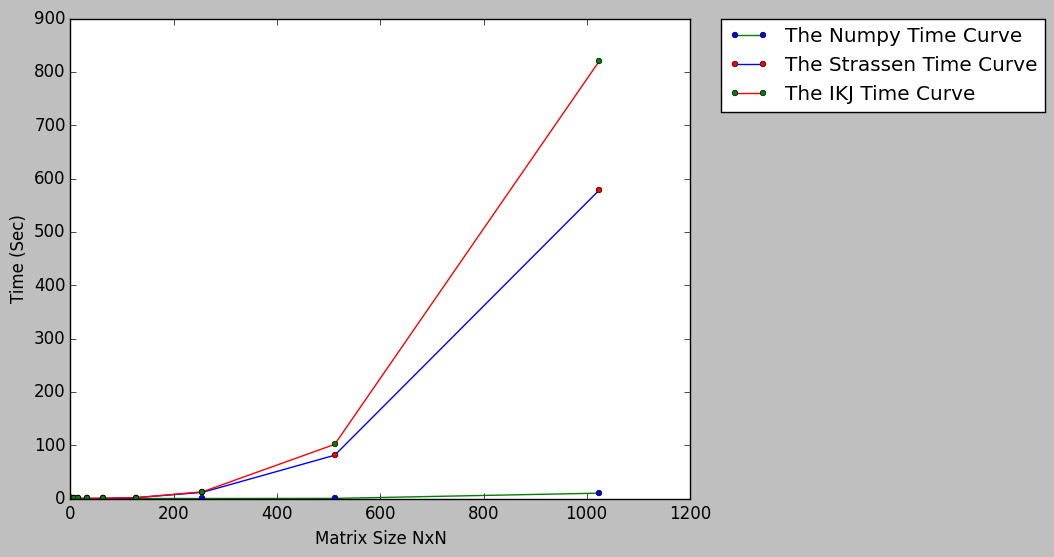

In [14]:
plt.figure(1)
numpyTimeCurve=plt.plot(sizeL, numpyTime, color='green', marker='o',
         markerfacecolor='blue', markersize=4,label="The Numpy Time Curve")
strassenTimeCurve=plt.plot(sizeL, strassenTime, color='blue', marker='o',
         markerfacecolor='red', markersize=4,label="The Strassen Time Curve")
ikjTimeCurve=plt.plot(sizeL, ikjTime, color='red', marker='o',
         markerfacecolor='green', markersize=4,label="The IKJ Time Curve")
plt.ylabel("Time (Sec)")
plt.xlabel("Matrix Size NxN")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


The above graph shows the time taken for each of the different algorithmic implementations and the numoy implementation.Lets take a closer look as to how it grows.

Below is the numpy implementation, a little more than 14 seconds for 1024 x 1024 size matrix. This is a drastic imporvement with respect to the IKJ and Strassen implementations in Python.

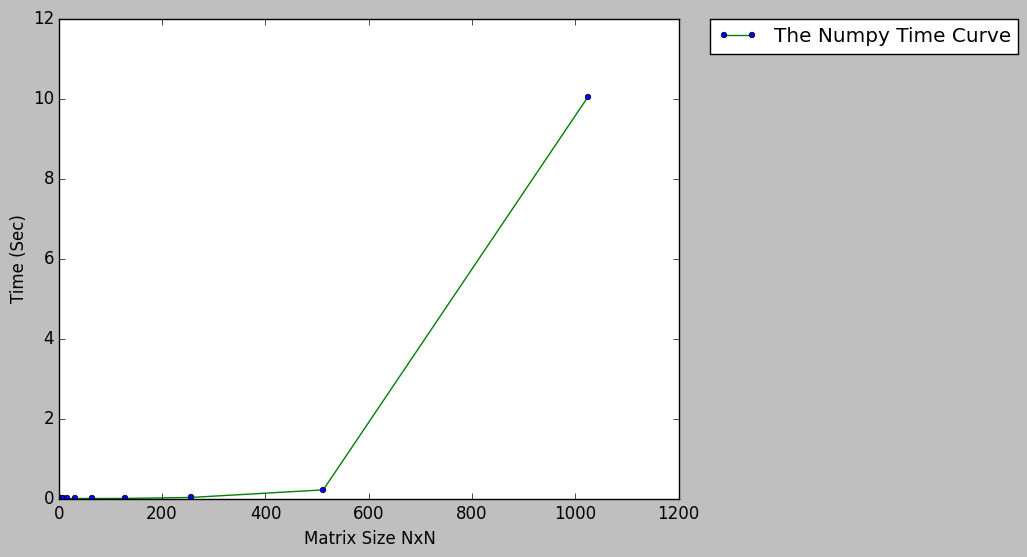

In [15]:
plt.figure(1)
plt.plot(sizeL, numpyTime, color='green', marker='o',
         markerfacecolor='blue', markersize=4,label="The Numpy Time Curve")
plt.ylabel("Time (Sec)")
plt.xlabel("Matrix Size NxN")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Below we have the a series of graphs showing the time taken to implement each of them with the last item being removed from the previous graph.

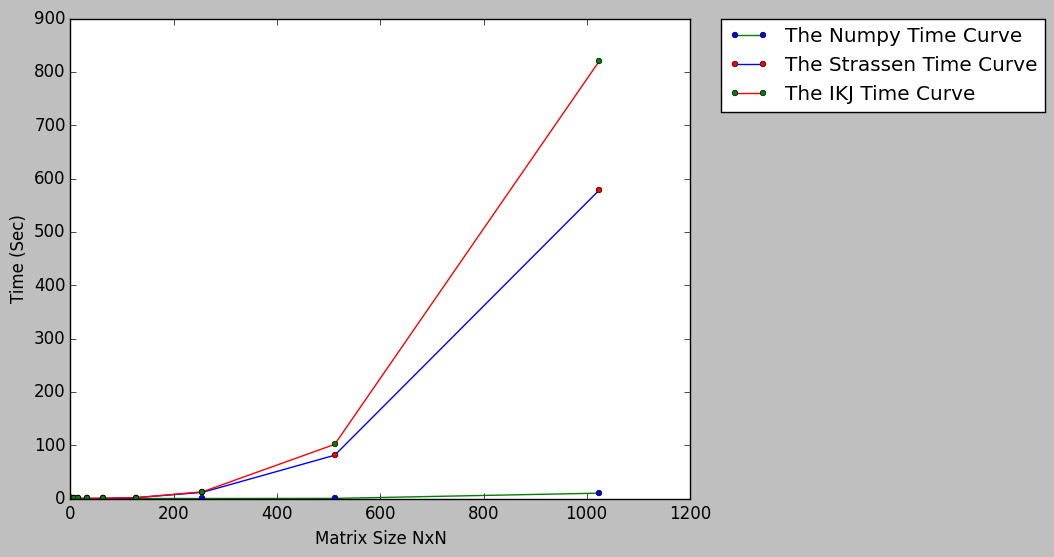

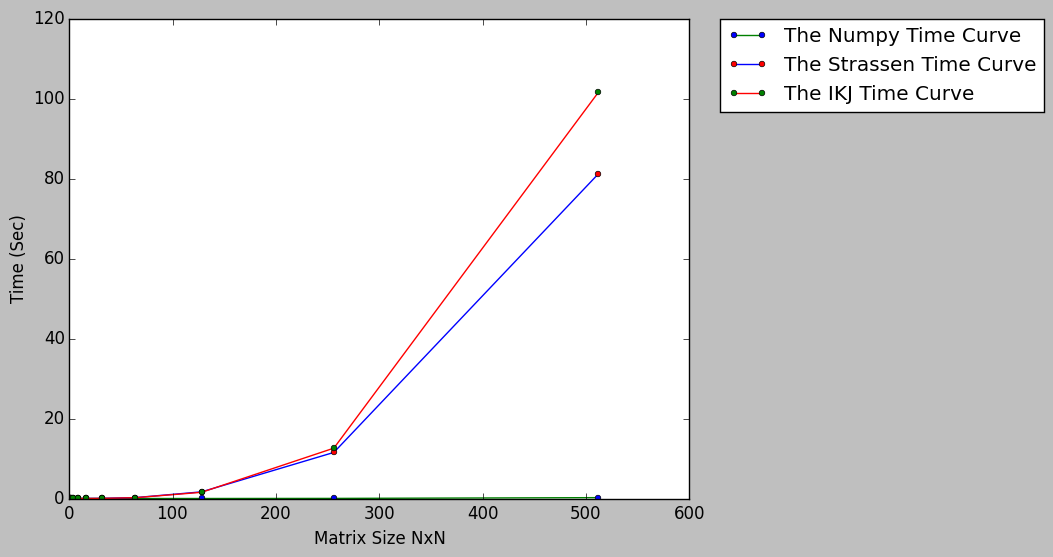

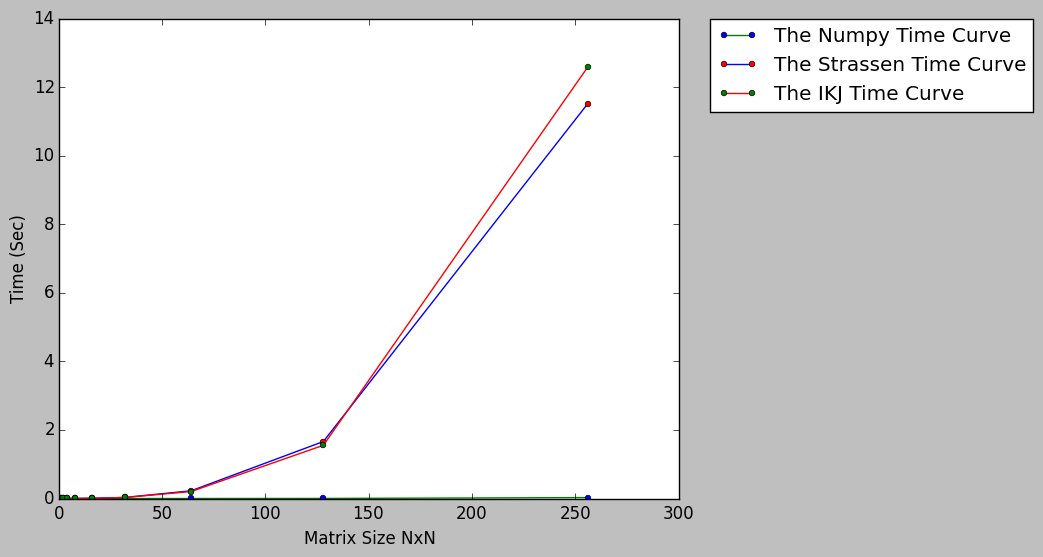

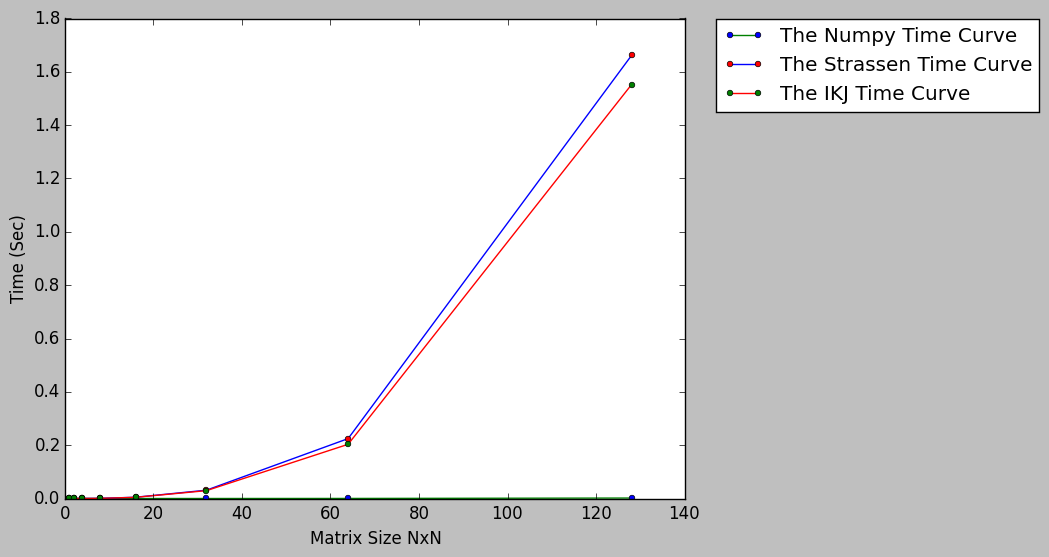

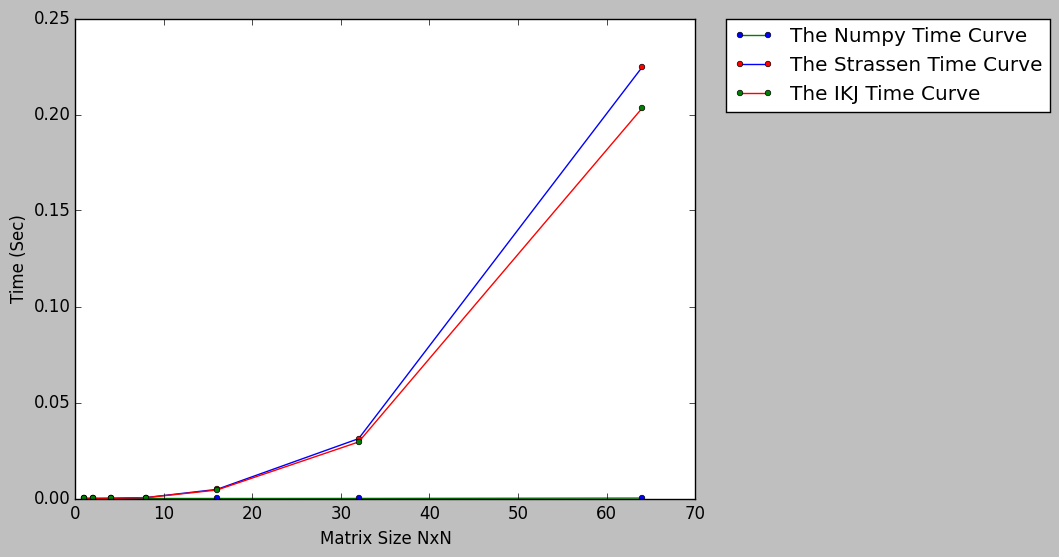

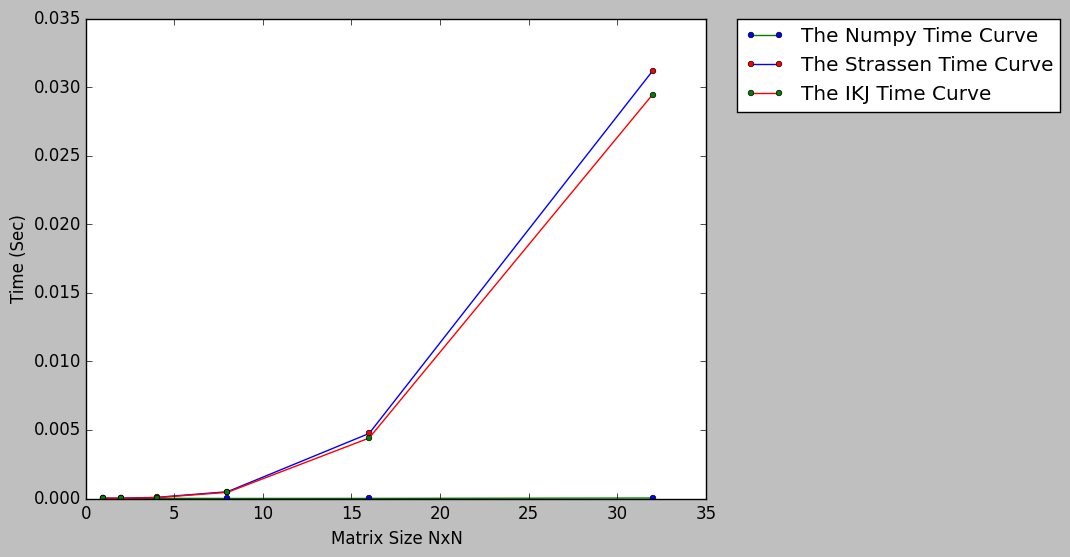

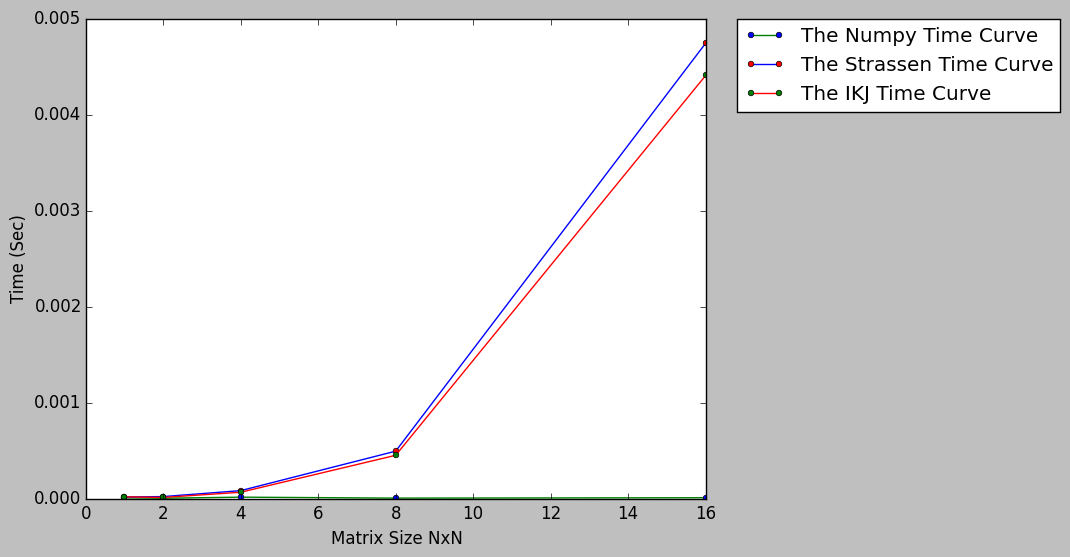

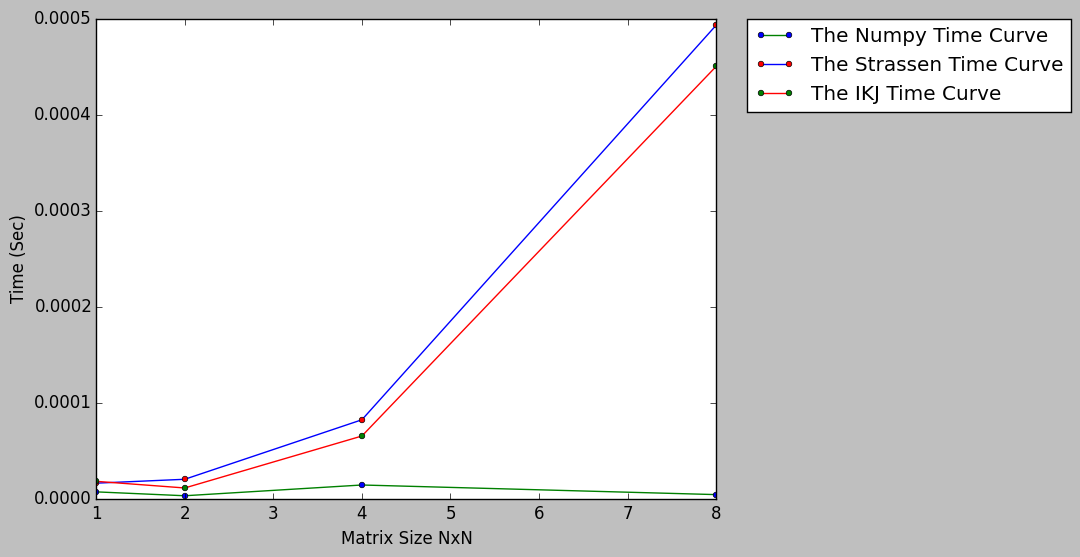

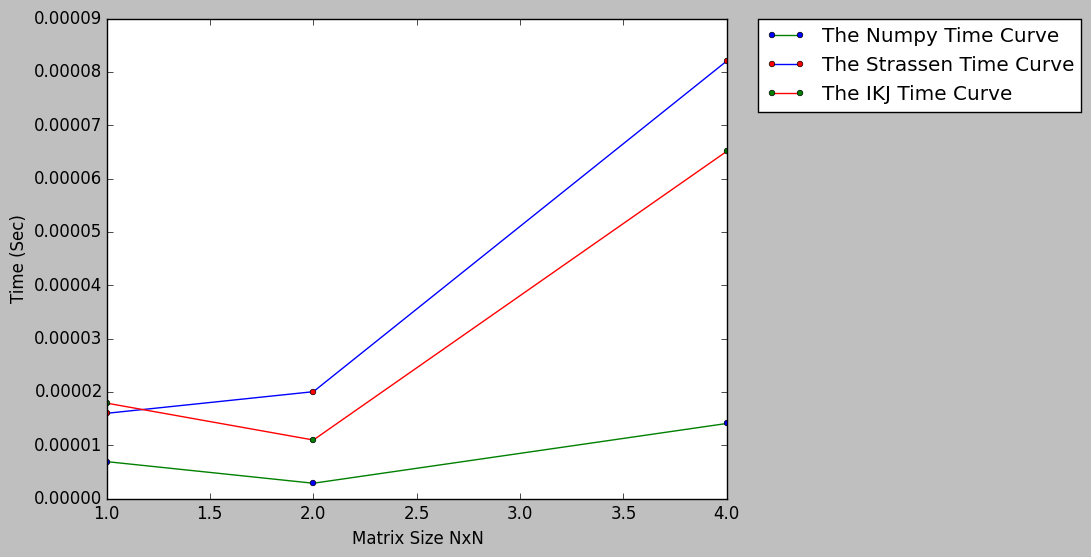

In [16]:
for i in range(0,9):
    plt.figure(i)
    numpyTimeCurve=plt.plot(sizeL[:len(sizeL)-i], numpyTime[:len(numpyTime)-i], color='green', marker='o',
             markerfacecolor='blue', markersize=4,label="The Numpy Time Curve")
    strassenTimeCurve=plt.plot(sizeL[:len(sizeL)-i], strassenTime[:len(strassenTime)-i], color='blue', marker='o',
             markerfacecolor='red', markersize=4,label="The Strassen Time Curve")
    ikjTimeCurve=plt.plot(sizeL[:len(sizeL)-i], ikjTime[:len(ikjTime)-i], color='red', marker='o',
             markerfacecolor='green', markersize=4,label="The IKJ Time Curve")
    plt.ylabel("Time (Sec)")
    plt.xlabel("Matrix Size NxN")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

As we can see above the IKJ algorithm seems to be doing better than the Strassen Algorithm.

I would assume that is because:
+ Python does not handle recursions as well as iterations, it does not support tail recursions and also has a stack limit of 1000.
+ Memory overhead. 

A fair comparision I guess would be to use iteration in C or Python and Strassens Algorithm in a functional language like Haskell which just *loves* recursion.

Numpy for a Unit Matrix actually performed worse in *some* instances than both IKJ and Strassen, which did just as well as the other. Here it performs just as the IKJ algorithm.

Observations:
+ IKJ does the same calculation in about half the time till the 64 x 64 size matrix
+ After 64 x 64 the gap seems to be slowing down and by 512 it seems to be less than 20 seconds apart, which is a lot but considering that the IKJ algorithm took about 120 seconds to do it. So the Strassens algorithm seems to be catching up.

Numpy does a lot better simply because it is heavily Ctyped and optimized.

After a sizeable matrix size the Stranssen Algorithm should do better than the IKJ Algorithm. I would assume. For everyday programming I would say it's best to use the builtin Martix Multiplication Method, saves you and your computer processing time.

More info on the [battle between Python and Recursion](http://neopythonic.blogspot.com/2009/04/tail-recursion-elimination.html) can be got from the Benevolent Dictator for Life of Python, Guido.

References:
+ [Guido van Rossums blog where he elaborated about his stand on python and recursion](http://neopythonic.blogspot.com/2009/04/tail-recursion-elimination.html)
+ [Martin Thomas GitHub page where he implemented the Strassen Algorithm](https://github.com/MartinThoma/matrix-multiplication/blob/master/Python/strassen-algorithm.py)